<>:64: SyntaxWarning: invalid escape sequence '\o'
<>:64: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-2088643581.py:64: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel("|($\omega_{exact}-\omega_0)t$| (rad)", fontsize=16)


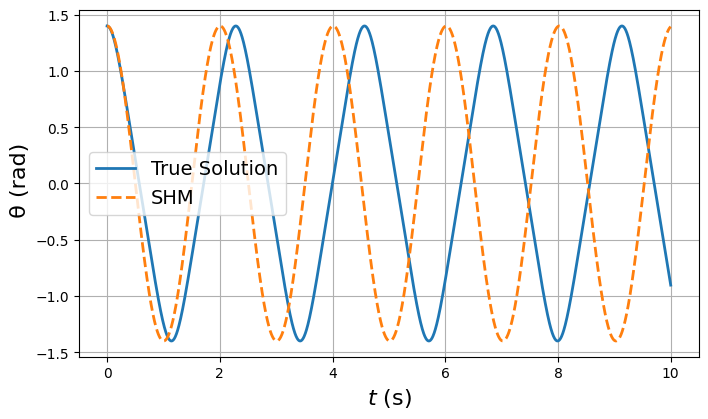

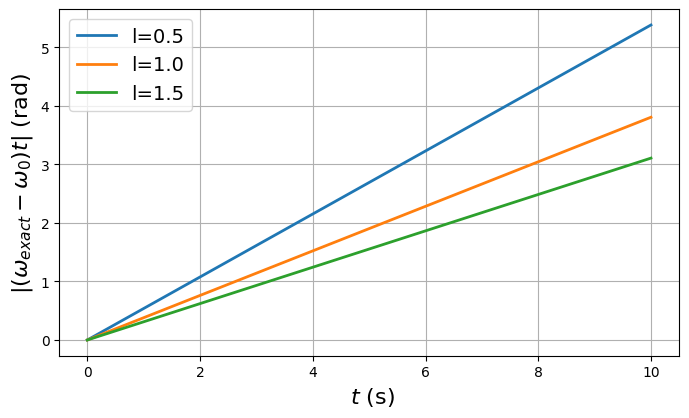

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import ellipj
from scipy.special import ellipk

# parameters
g = 9.81      # acceleration due to gravity
l = 1.0       # length of pendulum 1m
theta0 = 1.4  # angle in radians (large amplitude)

# time array
t = np.linspace(0, 10, 2000)

# small-angle solution
omega0 = np.sqrt(g/l)
theta_small = theta0 * np.cos(omega0 * t)

# exact nonlinear solution
k = np.sin(theta0/2)
u = omega0 * t
sn, cn, dn, _ = ellipj(u, k**2)       # jacobi elliptical functions
theta_exact = 2 * np.arcsin(k * cn)


# plot
plt.figure(figsize=(8,4.5))
plt.plot(t, theta_exact, label="True Solution", linewidth=2)
plt.plot(t, theta_small, "--", label="SHM", linewidth=2)
plt.xlabel("$t$ (s)", fontsize=16)
plt.ylabel(" θ (rad)",fontsize=16)
plt.legend(fontsize=14)
plt.grid(True)
plt.savefig("exact_vs_small.pdf")
plt.show()


k0 = np.sin(theta0 / 2)
l2=0.5
l3=1.5

omega02=np.sqrt(g/l2)
omega03=np.sqrt(g/l3)

T_exact_const2= 4 * np.sqrt(l2 / g) * ellipk(k0**2)
T_exact_const3 = 4 * np.sqrt(l3 / g) * ellipk(k0**2)
# exact frequency

T_exact_const = 4 * np.sqrt(l / g) * ellipk(k0**2)
omega_exact = 2 * np.pi / T_exact_const
omega_exact2= 2 * np.pi / T_exact_const2
omega_exact3 = 2 * np.pi / T_exact_const3
# phase difference
phase_diff = (omega_exact - omega0) * t

phase_diff2 = (omega_exact2 - omega02) * t
phase_diff3= (omega_exact3 - omega03) * t

# plot
plt.figure(figsize=(8,4.5))
plt.plot(t, abs(phase_diff2), label="l=0.5",linewidth=2)
plt.plot(t, abs(phase_diff),label="l=1.0", linewidth=2)
plt.plot(t, abs(phase_diff3), label="l=1.5",linewidth=2)
plt.xlabel(" $t$ (s)", fontsize=16)
plt.ylabel("|($\omega_{exact}-\omega_0)t$| (rad)", fontsize=16)
plt.legend(fontsize=14)
plt.grid(True)
plt.savefig("phasediff.pdf")
plt.show()


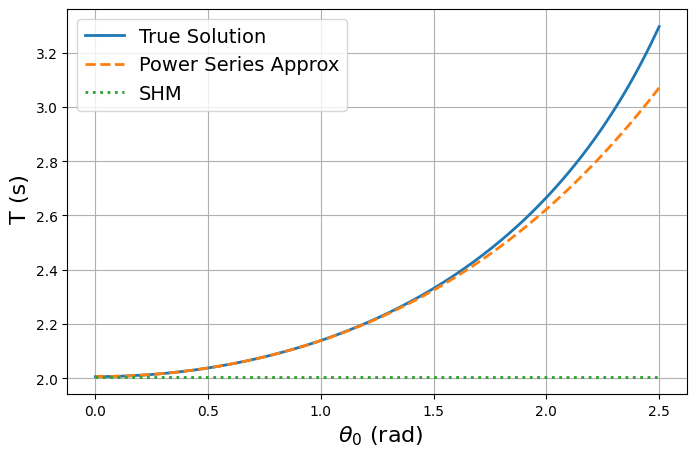

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import ellipk

# parameters
g = 9.81   # acceleration due to gravity
l = 1.0    # length of pendulum 1m

# angular amplitude range (radians)
theta = np.linspace(0.001, 2.5, 500)

# small-angle period
T0 = 2 * np.pi * np.sqrt(l / g)

# small-angle approximation
T_small = np.full_like(theta, T0)

# series approximation (up to theta^4)
T_series = T0 * (
    1
    + (1/16) * theta**2
    + (11/3072) * theta**4
)

# true nonlinear period
k = np.sin(theta / 2)
T_exact = 4 * np.sqrt(l / g) * ellipk(k**2)

# plot
plt.figure(figsize=(8,5))
plt.plot(theta, T_exact, label="True Solution", linewidth=2,)
plt.plot(theta, T_series, "--", label="Power Series Approx", linewidth=2)
plt.plot(theta, T_small, ":", label="SHM", linewidth=2)

plt.xlabel(r" $\theta_0$ (rad)",fontsize=16)
plt.ylabel(" T (s)",fontsize=16)
plt.legend(fontsize=14)
plt.grid(True)
plt.savefig("period_vs_amplitude.pdf")
plt.show()